![title](imgs/cover.png)

# Exploração dos dados
A segunda etapa do projeto é dedicada à análise exploratória dos dados (EDA), que serve como uma ponte entre a preparação dos dados e a modelagem de machine learning. Esta fase é fundamental para uma compreensão aprofundada do conjunto de dados, permitindo identificar características chave que influenciam o comportamento das variáveis e, consequentemente, o desempenho dos modelos preditivos.

Nesta etapa, são empregadas diversas técnicas de visualização de dados e análises estatísticas para explorar as relações entre as variáveis, identificar padrões, tendências e possíveis outliers. Ferramentas visuais como gráficos de barras, histogramas, box plots e gráficos de dispersão são utilizadas para visualizar distribuições de dados e correlações entre variáveis.

Além das visualizações e estatísticas, a exploração dos dados também envolve a análise de correlação para entender como as variáveis estão relacionadas entre si e quais são mais relevantes para a previsão de outras variáveis. Este passo é crucial para a seleção de features na próxima etapa de modelagem de machine learning, ajudando a refinar os modelos para que sejam mais eficientes e precisos.

---

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from sklearn.preprocessing import OrdinalEncoder

import seaborn as sns
# Configurações iniciais para os plots
sns.set(style="whitegrid")

In [2]:
# Import data
df = pd.read_csv('data/cleaned_test_data.csv', sep = ';')

In [3]:
print(df.shape)
df.head()

(585340, 14)


,country,creation_platform,admin_visits,intercom_conversations,source_pulido,creation_weekday,creation_hour,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,target
0,BR,mobile_app,1.0,0.0,Other,6,3,2.0,1,0.0,215.0,6.0,0.0,0
1,BR,mobile_web,2.0,0.0,Google CPC no Brand,6,3,1.0,1,0.0,0.0,44.0,0.0,0
2,BR,mobile_web,1.0,0.0,Google CPC no Brand,6,3,0.0,0,0.0,0.0,16.0,0.0,0
3,BR,mobile_web,1.0,0.0,Google CPC no Brand,6,3,0.0,0,0.0,0.0,15.0,0.0,0
4,BR,mobile_web,1.0,0.0,Google CPC no Brand,6,3,0.0,0,0.0,0.0,24.0,0.0,0


In [4]:
df.columns

Index(['country', 'creation_platform', 'admin_visits',
       'intercom_conversations', 'source_pulido', 'creation_weekday',
       'creation_hour', 'products_with_description',
       'total_products_with_images', 'total_product_categories',
       'total_events_on_Android', 'total_events_on_Web', 'total_events_on_iOS',
       'target'],
      dtype='object')

In [5]:
df['country'].value_counts(normalize = True)*100

country
BR    67.469847
AR    30.532169
MX     1.083473
CO     0.728466
CL     0.186046
Name: proportion, dtype: float64

In [6]:
df['creation_platform'].value_counts(normalize = True)*100

creation_platform
desktop       48.768066
mobile_web    43.820515
mobile_app     6.821335
tablet         0.590084
Name: proportion, dtype: float64

In [7]:
df['source_pulido'].value_counts(normalize = True)*100

source_pulido
Facebook CPC              19.300236
Other                     17.838863
Google CPC no Brand       17.379130
Brand                     14.512933
Google Organic             9.734855
Google CPC DSA             7.257662
partners                   4.872894
Direct                     4.063450
Store Referral             3.386237
Google CPC Competitors     1.653740
Name: proportion, dtype: float64

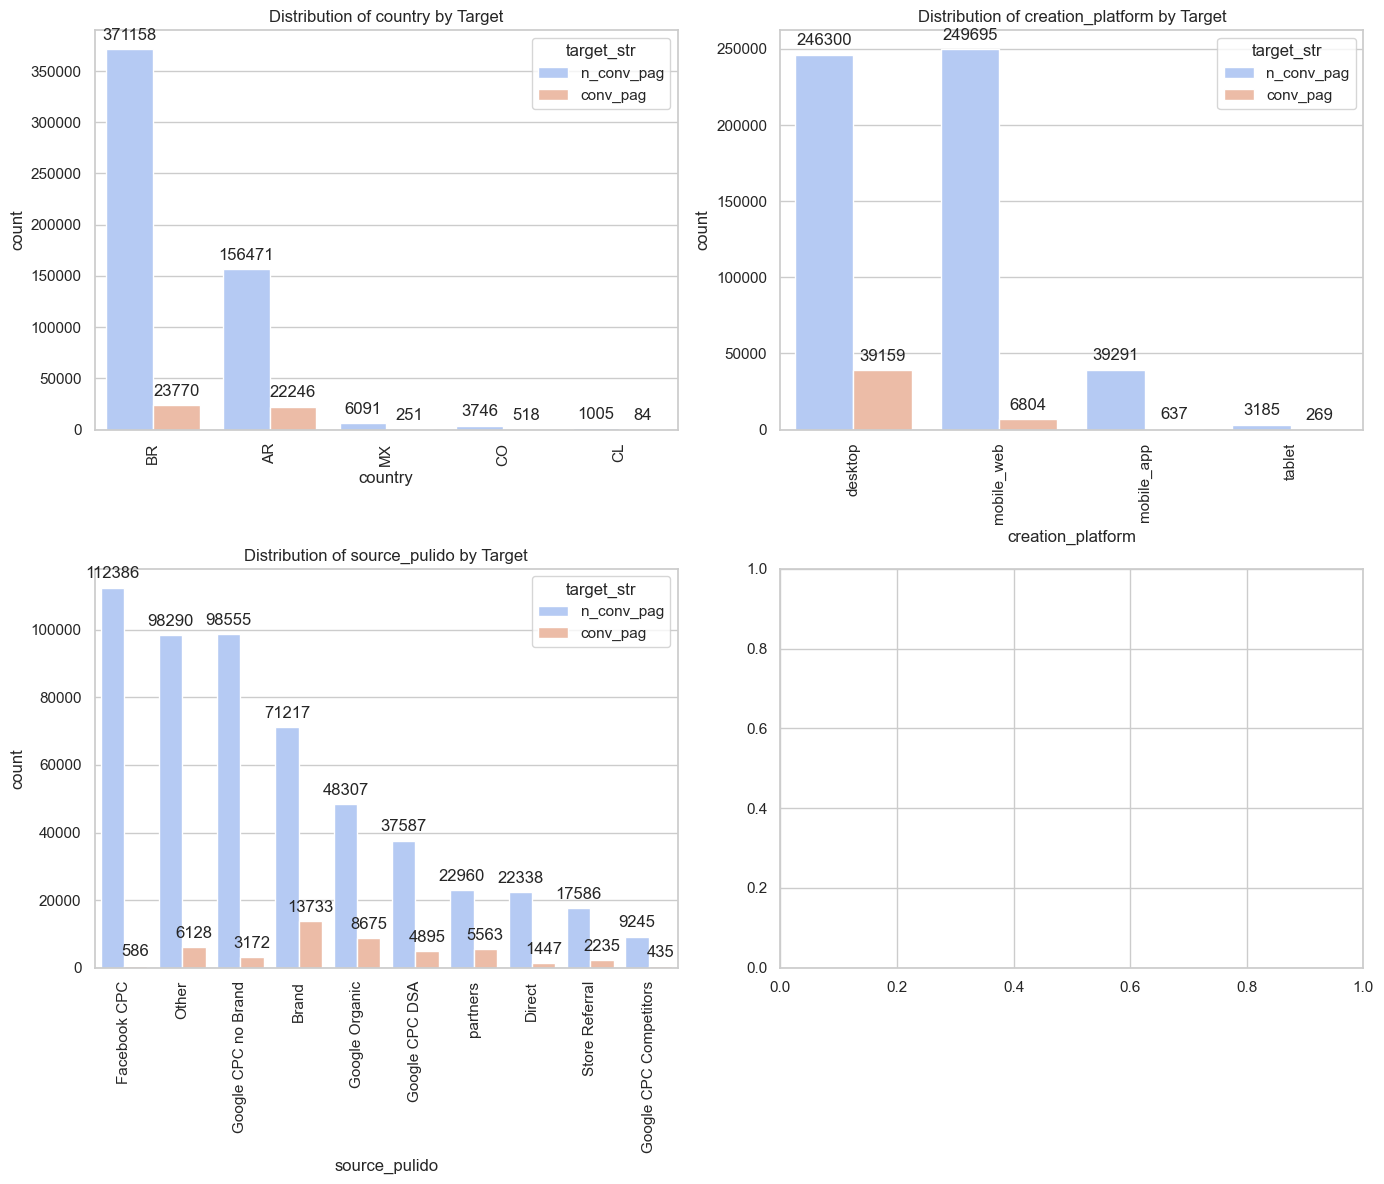

In [8]:
df_plot = df.copy()

df_plot['target_str'] = df_plot['target'].replace([0, 1], ['n_conv_pag', 'conv_pag'])

# Filtrando apenas colunas não numéricas, exceto 'Target' e 'target_str'
categorical_columns = df_plot.select_dtypes(exclude=['int64', 'float64']).columns.drop('target_str')

# Definindo o layout do grid de plots
n_plots = len(categorical_columns)

n_cols = 2  # Número de colunas no grid
n_rows = (n_plots + n_cols - 1) // n_cols  # Número de linhas, arredondado para cima

# Criando uma figura para conter os plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6 * n_rows))

for i, column in enumerate(categorical_columns):
    # Determina a posição do plot no grid
    row, col = divmod(i, n_cols)
    ax = axes[row, col]
    
    # Determinar a ordem das categorias do maior para o menor
    order = df[column].value_counts().index
    
    # Cria o gráfico de barras verticais
    sns.countplot(x=column, hue='target_str', data=df_plot, palette='coolwarm', ax=ax, order=order, orient = "h")
    ax.set_title(f'Distribution of {column} by Target')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Adicionando valores em cima das barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

# Ajuste final para melhorar a apresentação e evitar sobreposição de elementos
plt.tight_layout()
plt.show()

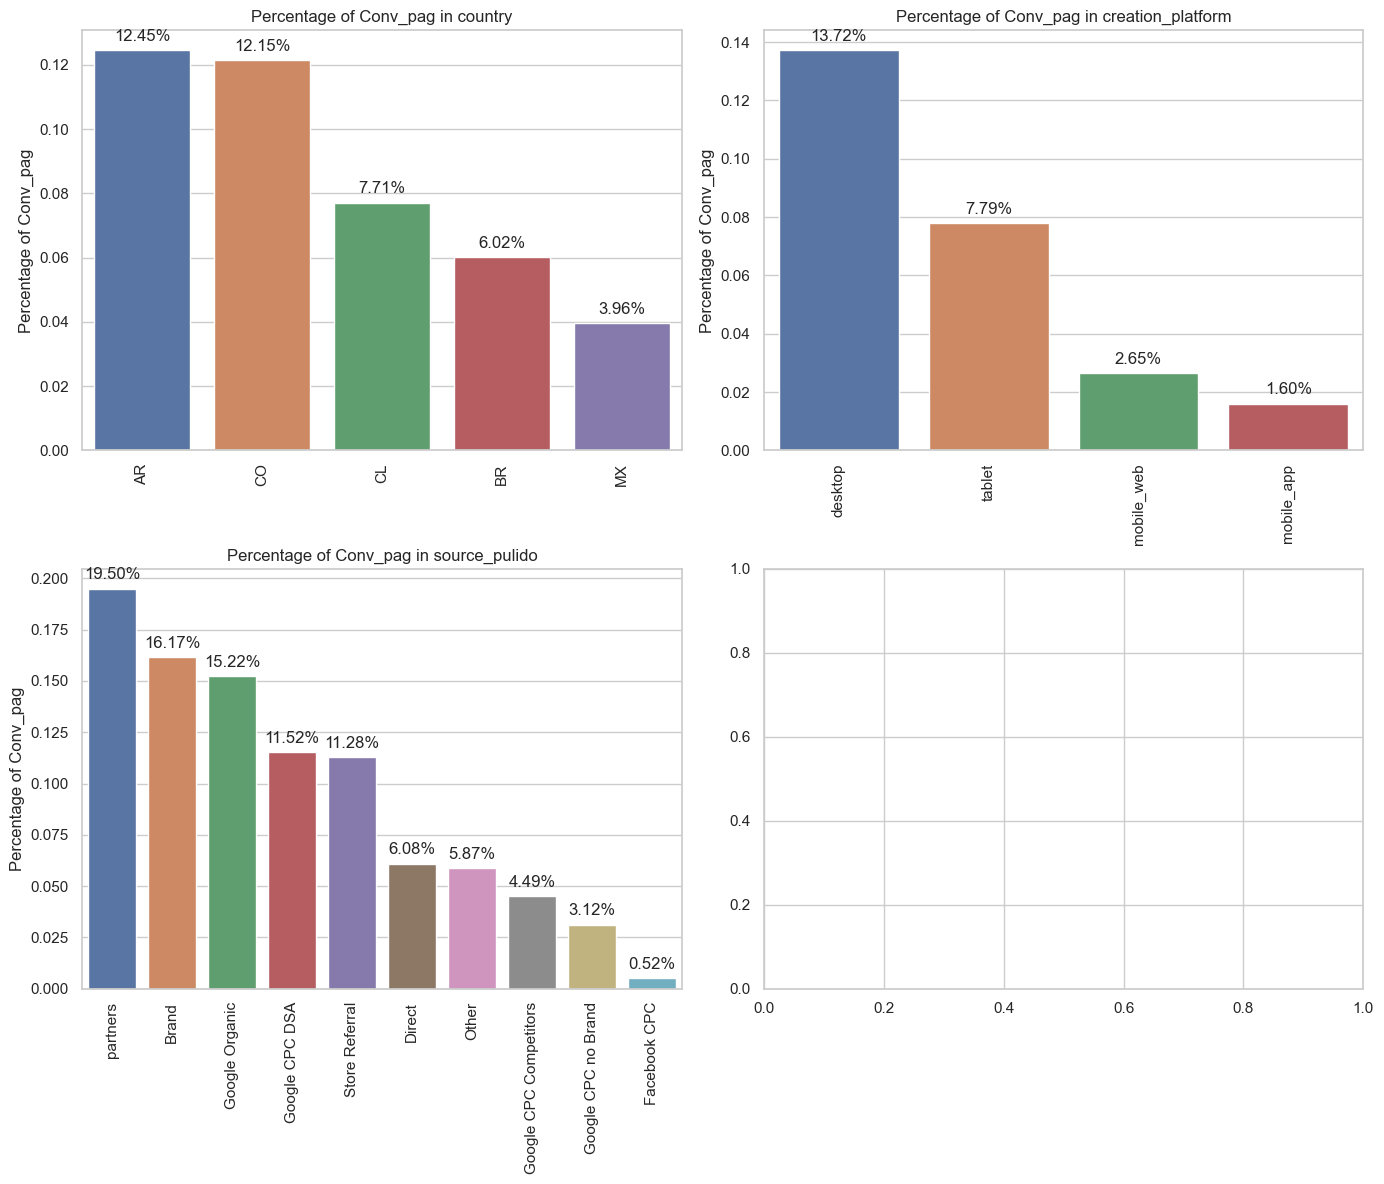

In [9]:
# Definindo o layout do grid de plots
n_plots = len(categorical_columns)

n_cols = 2  # Número de colunas no grid
n_rows = (n_plots + n_cols - 1) // n_cols  # Número de linhas, arredondado para cima

# Criando uma figura para conter os plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6 * n_rows))

for i, column in enumerate(categorical_columns):
    # Determina a posição do plot no grid
    row, col = divmod(i, n_cols)
    ax = axes[row, col]
    
    # Agregar dados para calcular a proporção de 'conv_pag' por categoria
    prop_data = df_plot.groupby(column)['target'].mean().reset_index()
    prop_data.sort_values('target', ascending=False, inplace=True)

    # Plotar a proporção de 'conv_pag'
    sns.barplot(x=column, y='target', data=prop_data, ax=ax, order=prop_data[column])
    ax.set_title(f'Percentage of Conv_pag in {column}')
    ax.set_xlabel('')
    ax.set_ylabel('Percentage of Conv_pag')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Adicionando os valores das proporções em cima das barras
    for p in ax.patches:
        percentage = f'{100 * p.get_height():.2f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Ajuste final para melhorar a apresentação e evitar sobreposição de elementos
plt.tight_layout()
plt.show()


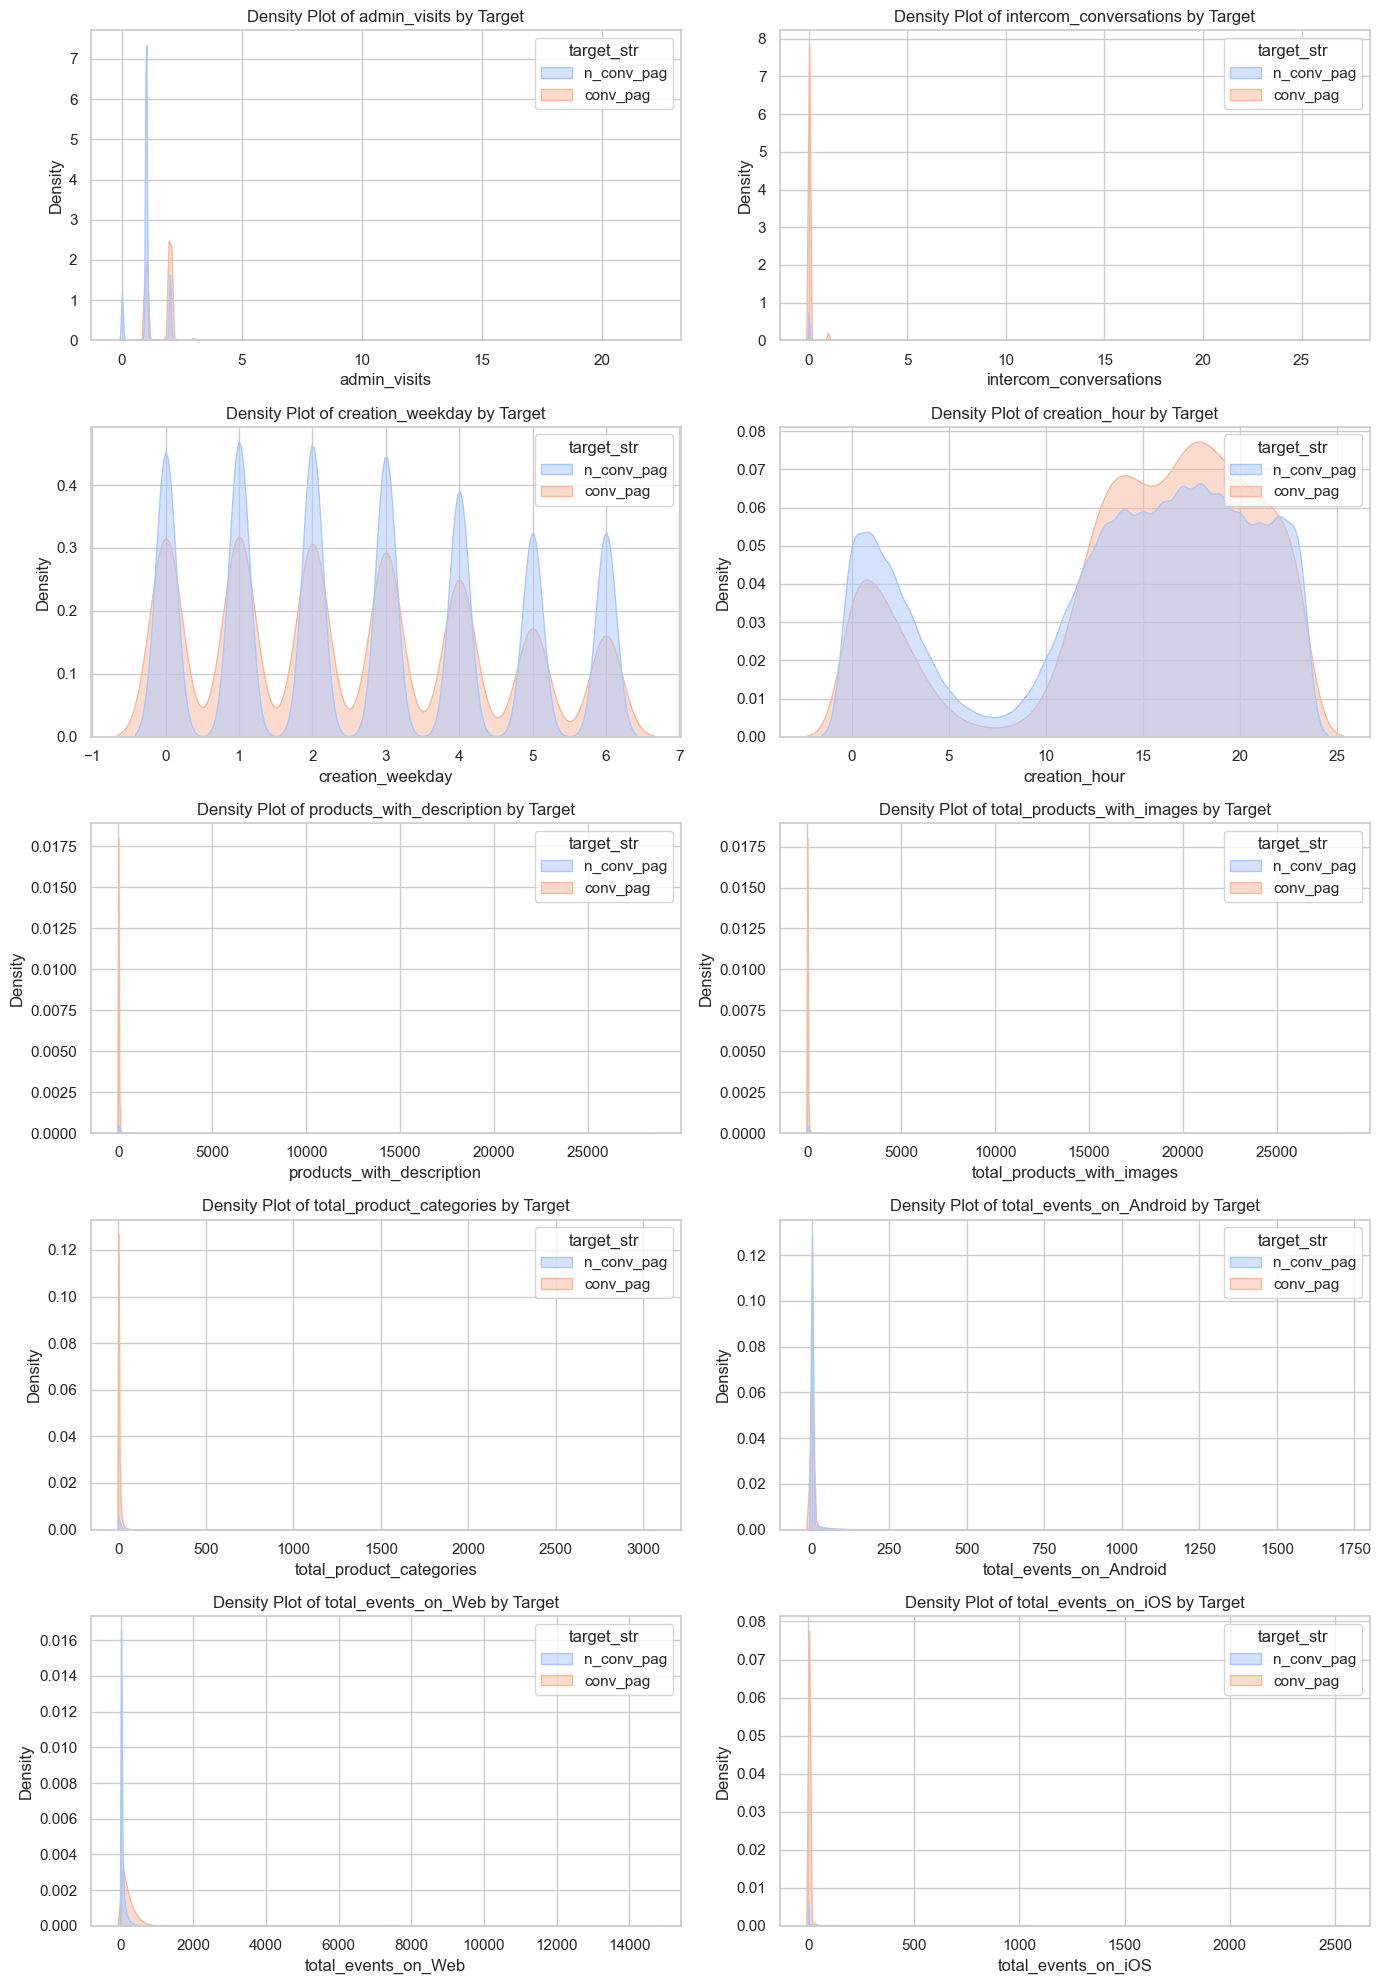

In [10]:
# Filtrando apenas colunas numéricas
numeric_columns = df_plot.select_dtypes(include=['int64', 'float64']).columns.drop('target')  # Excluindo 'Target'

# Definindo o layout do grid de plots
n_plots = len(numeric_columns)

n_cols = 2  # Número de colunas no grid
n_rows = (n_plots + n_cols - 1) // n_cols  # Número de linhas, arredondado para cima

# Criando uma figura para conter os plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))

for i, column in enumerate(numeric_columns):
    # Determina a posição do plot no grid
    row, col = divmod(i, n_cols)
    ax = axes[row, col]
    
    # Cria o gráfico de densidade
    sns.kdeplot(data=df_plot, x=column, hue='target_str', fill=True, common_norm=False, alpha=0.5, palette='coolwarm', ax=ax)
    ax.set_title(f'Density Plot of {column} by Target')
    ax.set_ylabel('Density')

# Esconde os subplots vazios se o número de plots não preencher completamente o grid
for j in range(i + 1, n_rows * n_cols):
    axes.flatten()[j].set_visible(False)

# Ajuste final para melhorar a apresentação e evitar sobreposição de elementos
plt.tight_layout()
plt.show()

# Cálculo da matriz de correlação

In [11]:
# Identificando colunas numéricas (int e float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['admin_visits', 'intercom_conversations', 'creation_weekday',
       'creation_hour', 'products_with_description',
       'total_products_with_images', 'total_product_categories',
       'total_events_on_Android', 'total_events_on_Web', 'total_events_on_iOS',
       'target'],
      dtype='object')

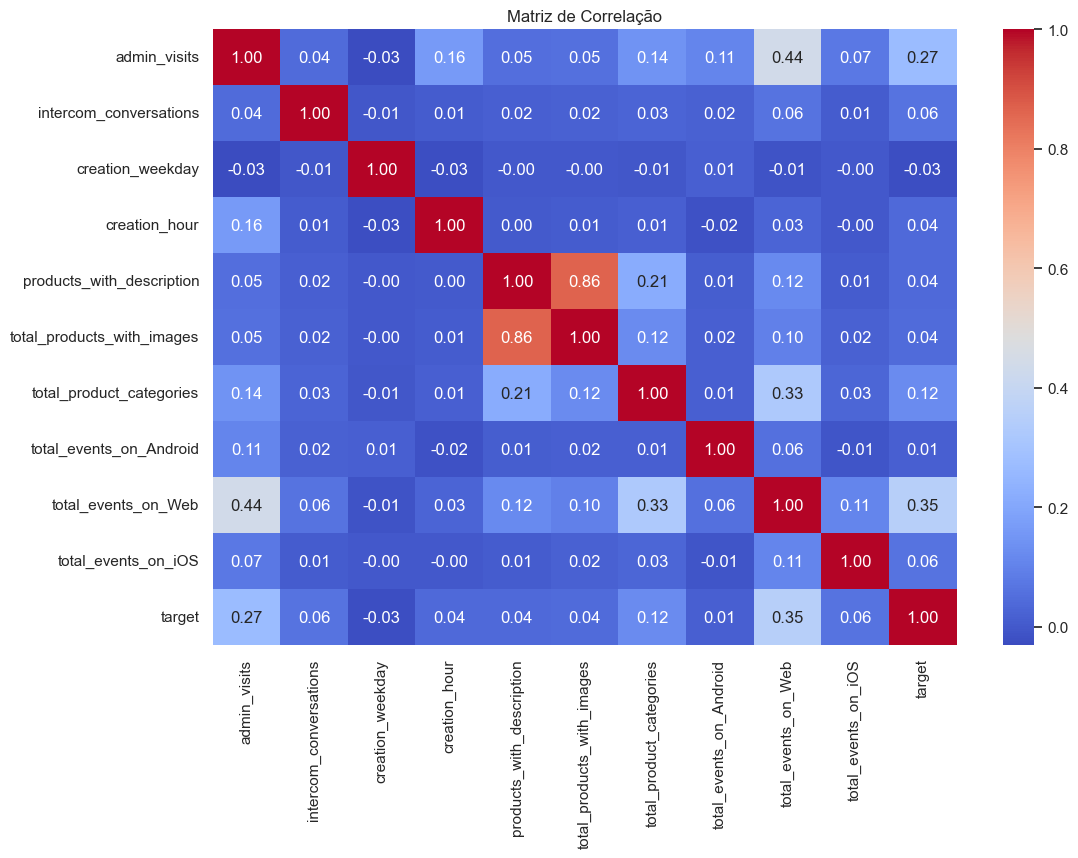

In [12]:

correlation_matrix = df[numeric_columns].corr()

# Visualização da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [15]:
# Checando quais colunas são do tipo 'object', indicando variáveis categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

df_cat = df[categorical_columns].copy()

# Inicializando o codificador ordinal
encoder = OrdinalEncoder()

# Codificando as variáveis categóricas
df_cat[categorical_columns] = encoder.fit_transform(df_cat[categorical_columns])


df_cat['target'] = df['target']

# Exibindo o DataFrame com as variáveis categóricas codificadas
df_cat.head()

,country,creation_platform,source_pulido,target
0,1.0,1.0,7.0,0
1,1.0,2.0,5.0,0
2,1.0,2.0,5.0,0
3,1.0,2.0,5.0,0
4,1.0,2.0,5.0,0


In [16]:

# Função para calcular a Correlação de Cramér V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# Função para criar a matriz de correlação
def categorical_correlation_matrix(df):
    columns = df.select_dtypes(include=['category', 'object']).columns
    corr_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)
    for col1 in columns:
        for col2 in columns:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1.0
            else:
                corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
    return corr_matrix



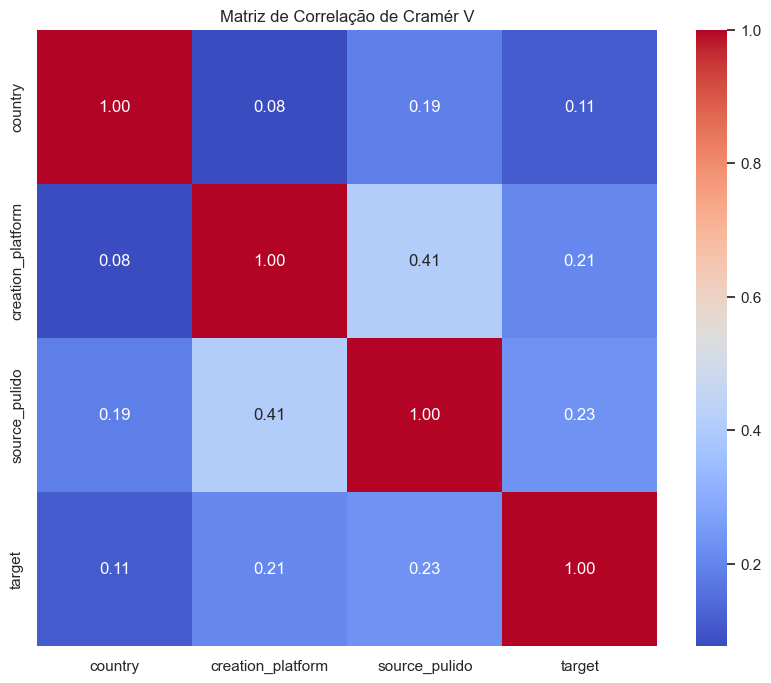

In [17]:
# Convertendo todas as colunas categóricas para tipo 'category' para garantir consistência
for col in df_cat.columns:
    df_cat[col] = df_cat[col].astype('category')

# Calculando a matriz de correlação
correlation_matrix = categorical_correlation_matrix(df_cat)

# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação de Cramér V')
plt.show()


![title](imgs/end.png)